# Machine Learning SoSe21 Practice Class

Dr. Timo Baumann, Dr. Özge Alaçam, Björn Sygo <br>
Email: baumann@informatik.uni-hamburg.de, alacam@informatik.uni-hamburg.de, 6sygo@informatik.uni-hamburg.de

## Exercise 6
**Description:** Clustering<br>
**Deadline:** Saturday, 12. June 2021, 23:59 <br>
**Working together:** You can work in pairs or triples but no larger teams are allowed. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Please adhere to the honor code discussed in class. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; All members of the team must get involved in understanding and coding the solution.

## Submission:
**Moritz Lahann, Christoph Brauer**

*Also put high-level comments that should be read before looking at your code and results.*

## Goal
The goal of this exercise is to implement k-means- and mixture-of-gaussian-clustering, two foundational clustering algorithms and to experiment with their performance on various datasets.

It is mandatory, that your implementations, except the plotting, works for data of <strong>arbitrary dimensionality</strong> and with <strong>arbitrarily many clusters</strong>.

### Data
For this task, you have a collection of datafiles that contain datasets to be clustered. Each of the files has the same structure as the previous datafiles, so there is one datapoint per line consisting of n-dimensions and a label. <strong>The label has to be ignored during clustering</strong>. Its purpose is to help plotting the actual labels of all points later.
While you can choose which exact datasets you use, please test your later implemented algorithms at least on:
- some of the files containing equally sized clusters (3clustersX)
- at least one of the files containing differently sized clusters (3differentlysizedclustersX)
- at least one of the files with 3-dimensional data (3clustersin3dX)

**Task 1** (10%):
(a) Load the data.
(b) Implement a function that plots the datapoints with their assigned labels and plot the datapoints with their original labels. You can later use this function to plot the results of your algorithms. It will also help to output the centroids of the "true" clusters in your data, to assess the performance of your clustering algorithms. If your plotting for the 3-dimensional data doesn't work, it's fine.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def load_data_shuffled(path):
    data = np.loadtxt(path)
    np.random.shuffle(data)
    return data[:, :-1], data[:, -1]

def plot(data, labels):
    if data.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(labels):
            label_indices = np.argwhere(labels == label)
            label_data = data[label_indices[:, 0]]
            ax.scatter(label_data[:, 0], label_data[:, 1], label_data[:, 2])
    else:
        for label in np.unique(labels):
            label_indices = np.argwhere(labels == label)
            label_data = data[label_indices[:, 0]]
            plt.scatter(label_data[:, 0], label_data[:, 1])
    plt.show()

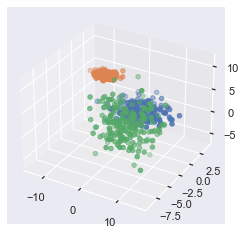

In [34]:
x, y = load_data_shuffled('3clustersin3d3')
plot(x, y)

### K-means-Clustering

#### Implementation
**Task 2** (20%): Implement the k-means clustering algorithm as described in class and in the lecture notes.

#### Analysis
**Task 3** (5%): Plot the results of your algorithm on the datasets you have chosen based on the criteria above. Your plot should include the datapoints with their assigned labels and the centroids for each cluster. Please also print the coordinates of these centroids. Furthermore, you should discuss the successes and failures of this algorithm on the datasets.

### Mixture-of-Gaussians-Clustering

#### Implementation
**Task 4** (30%): Implement the mixture of Gaussians clustering algorithm as described in class and in the lecture notes.

For the initialization of your parameters, you may use different strategies:
- Randomly assign each datapoint to clusters and compute the initial $\phi / \mu / \Sigma$ accordingly
- Assume, that $\phi_i = \frac{1}{k}$ initially; choose $\mu$ equal to randomly selected datapoints; set $\Sigma$ to match the full sample
- assign datapoints according to k-means clustering and initialize $\phi / \mu / \Sigma$ accordingly.

Your algorithm should terminate, after the improvement of your data's likelihood given your model falls below a certain $\epsilon$. (Good $\epsilon$ values depend on the number of samples and clusters; .00001 is a safe bet.)

#### Analysis
**Task 5** (10%): 
Plot the results of your implementation on the same datasets you have used already for k-means. Besides the labeled datapoints, your plot should also include the centroids as well as an indication for each Gaussian (shading, contour, ...). You should also discuss the successes and failures of this algorithm on your datasets.

### Approximating the global optimum by selecting from multiple random initializations

#### Implementation
**Task 6** (10%): 
Implement a wrapper for clustering algorithms, that selects the best of $N$ runs as its result. Use the model quality (distortion for k-means and log-likelihood for mixture-of-Gaussians) for model selection.

#### Analysis
Choose one of the datasets from above for the analyses.

**Task 7** (5%): 
Plot the influence of $N$ on the improvements that the wrapper gains over k-means clustering.
Test and discuss how the different initializations for the mixture-of-Gaussians algorithm (random vs. k-means output) influences the wrapper on mixture-of-Gaussians clustering.

### Runtime
**Task 8** (10%): 
Finally, you should compare the runtime of k-means and Mixture-of-Gaussians based on their O-notation (in terms of k, the number of dimensions and the number of samples).
<strong>You should only work a maximum of 30 minutes on this subtask. However, report your results even if you aren't finished after that time.</strong>

### Report Submission

Prepare a report of your solution as a commented Jupyter notebook (using markdown for your results and comments); include figures and results.
If you must, you can also upload a PDF document with the report annexed with your Python code.

Upload your report file to the Machine Learning Moodle Course page. Please make sure that your submission team corresponds to the team's Moodle group that you're in.